# Setting up

In [56]:
# Default imports
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
import joblib
import os
import math

# Pre processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import f_classif, chi2
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from scipy.stats import shapiro, boxcox, pearsonr, anderson
from scipy.special import inv_boxcox
from scipy.stats import kurtosis, skew

# Sampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline, make_pipeline as imb_make_pipeline

# Model evaluation
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, RocCurveDisplay
from sklearn.metrics.cluster import contingency_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict
from hyperopt import hp, fmin, tpe, space_eval
from sklearn.decomposition import PCA
import shap


# Models
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, MeanShift, OPTICS, Birch, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
import xgboost as xgboost
import lightgbm as lgboost
import catboost as catboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# PyTorch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
import torch
import torch.nn.functional as F
from hyperopt import Trials

import warnings
warnings.filterwarnings('ignore')

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Preparation (same as trainset)

Preparing variables

In [58]:
path = 'data/'
train_data = pd.read_csv(path + "processed_data.csv",header=0,index_col='ID')
print('Data loaded sample : ')
train_data.drop(['species'], axis=1, inplace=True)
print(train_data.shape)
train_data.head()

Data loaded sample : 
(249, 137)


,bug_type,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,mask_compactness,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_mask_max,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_max,blue_rest_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_min,hue_rest_min,hue_mask_max,hue_rest_max,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_mask_min,saturation_rest_min,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_rest_max,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9,orthogonal_lines_ratio
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bee,0.007199,65.842518,70.059270,0.046706,245.172338,55.348483,362.548639,127.671981,-0.057930,-0.817833,0.811060,172773,6818,0.046706,265227.5,0.651414,0.286969,0.826408,4.100518,0.878376,0.477971,0.099935,-0.840749,0.541425,0.502645,434.179165,1566.469267,545.078940,252.452196,7.460814,6.967513,5,1,203,255,66.750522,107.403577,54,128,47.329372,61.073311,26,43,99,156,3,2,199,255,53.387028,105.378123,36,123,44.415601,58.068684,17,49,81,151,0,0,186,255,38.786193,84.573068,23,85,35.298702,57.198890,13,28,54,132,0,0,178,179,22.955340,42.776885,14,27,35.494402,46.076375,10,21,20,38,0,0,255,255,113.963825,66.078872,115.0,51,41.474470,50.351267,83,26,143,102,5,3,203,255,66.826408,109.176003,55,128,47.295039,59.737595,26,50,99,156,0.802350,0.596853,-0.025349,-0.008629,-0.013720,0.006373,-0.001826,-0.004257,-0.010642,0.004364,-0.001702,0.008064,-0.001693,0.002286,-0.003509,0.004708,-0.000954,0.001356,-0.002313,0.000987,0.679289
2,Bee,0.008306,68.896841,40.143673,0.048440,279.998031,85.163883,478.802953,108.009513,-0.063210,-0.616582,0.652482,199332,7191,0.048440,350945.5,0.567986,0.320907,0.997932,5.416759,0.568091,0.822966,0.090493,-0.965743,0.259500,0.426842,632.800093,4440.118453,1357.730195,350.976352,7.471152,6.811326,2,0,248,255,62.015547,101.106455,54,120,41.367330,61.737563,25,36,95,151,2,1,251,255,50.140876,98.708295,32,116,41.829106,58.443197,16,42,81,145,0,0,244,255,34.095609,74.862067,18,65,33.493150,56.037654,

In [59]:
test_data = pd.read_csv(path + "processed_test_data.csv",header=0,index_col=0)
test_data.index.name = 'ID'
print(test_data.shape)
test_data.head()

(97, 137)


,bug_type,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,orthogonal_lines_ratio,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,mask_compactness,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_mask_max,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_max,blue_rest_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_min,hue_rest_min,hue_mask_max,hue_rest_max,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_mask_min,saturation_rest_min,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_rest_max,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
251,Bee,0.012571,34.232035,39.912501,0.955036,0.075980,363.482391,127.254528,712.967098,202.402522,0.785066,-0.200170,0.874382,301712,7064,0.075980,527273.5,0.572212,0.433238,0.708618,139.498230,0.785567,0.618777,0.107535,-0.777238,0.629207,0.337590,722.797816,2138.324178,757.012988,347.602106,6.848424,7.451575,5,12,255,255,112.184557,94.196447,108,93,47.170932,31.210339,81,75,141,109,0,5,255,252,100.732742,111.240172,104,116,47.446011,32.862618,63,94,130,133,0,10,255,255,72.337361,55.566709,61,47,42.760350,36.834149,42,36,99,60,0,0,179,179,28.179714,44.503692,19,41,32.103720,25.785482,14,38,30,42,0,0,255,222,102.489400,140.828899,103,147,41.545353,30.497805,71,133,133,160,6,26,255,255,114.225072,115.022385,112,118,47.102017,35.004543,82,96,142,135,0.824002,0.566587,-0.074371,0.001864,-0.023904,-0.001017,-0.015288,-0.001359,-0.008841,0.002277,-0.016440,0.000427,-0.002448,-0.003144,-0.007055,0.008961,-0.011049,-0.006328,0.000692,0.000964
252,Bee,0.015660,28.474569,38.199244,0.418034,0.128352,352.877940,99.598659,521.372169,117.222774,-0.285273,-0.612493,0.834891,375834,6066,0.128352,465431.5,0.807496,0.439881,0.610884,123.540642,0.561023,0.827800,0.092629,0.500123,-0.865954,0.485416,511.281735,919.058001,217.548839,329.964953,6.653125,7.434753,22,21,245,255,147.941022,88.316226,150,82,46.765327,31.830251,113,68,187,99,11,9,224,235,127.096875,89.628264,128,86,44.497618,26.937632,95,73,163,100,8,12,255,255,132.152299,88

In [60]:
first_test_id = test_data.index[0]
first_test_id

251

In [61]:
data = pd.concat([train_data, test_data], axis=0)
print(data.shape)
data.tail()

(346, 137)


,bug_type,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,mask_compactness,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_mask_max,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_max,blue_rest_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_min,hue_rest_min,hue_mask_max,hue_rest_max,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_mask_min,saturation_rest_min,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_rest_max,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9,orthogonal_lines_ratio
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
343,Bee,0.014897,53.429873,55.499780,0.143115,360.812943,103.069191,542.534475,169.166078,-0.067651,-1.295083,0.626923,357534,5603,0.143115,488169.0,0.732398,0.484757,0.626525,84.348442,0.531708,0.846928,0.090127,-0.122174,-0.992509,0.527274,683.351540,1032.184980,338.797889,397.941324,7.150870,7.076172,11,5,200,253,103.694600,80.624921,109,58,39.255052,56.670498,77,44,133,102,7,11,183,253,77.160150,92.562063,77,77,33.739929,52.859344,53,56,100,116,4,1,201,255,57.854990,71.171534,53,50,30.150168,58.670596,37,34,73,76,0,0,179,179,25.586053,53.505002,13,48,41.834943,25.654529,11,41,16,56,0,0,240,232,112.592604,81.963523,114.0,89,43.030347,36.171983,82,66,145,105,11,11,201,255,103.908800,94.242015,109,78,39.272757,55.801183,77,56,133,117,0.824720,0.565542,-0.050092,-0.001639,-0.033918,-0.003150,-0.019483,-0.003123,-0.010906,-0.000049,-0.007465,-0.000605,-0.005467,0.001720,-0.007223,0.000152,-0.007227,-0.001008,-0.006672,-0.000802,0.418113
344,Bee,0.017551,36.261817,62.981213,0.099547,365.340178,96.302185,565.040855,162.860782,-0.019667,-0.958593,0.950617,421222,7292,0.099547,576862.0,0.730195,0.398510,0.821891,129.045822,0.775548,0.631289,0.098368,0.249396,-0.968402,0.469000,512.809948,2074.795159,609.538813,331.951354,7.154222,7.313481,7,6,229,238,104.661342,74.958347,109,51,42.209718,55.220538,73,38,135,104,3,10,212,232,81.730434,83.641084,77,65,41.810742,52.845095,48,46,111,115,0,2,225,253,60.045999,65.059856,52,42,3

In [62]:
RANDOM_STATE = 10
print(data.bug_type.value_counts())
data = data.drop(['mask_compactness'], axis=1)
for col in data.columns:
    col_sum = data[col].sum()
    if col_sum == 0:
        print('Dropped column because completely null:', col)
        data.drop(col, axis=1, inplace=True)
data.head()

bug_type
Bee          151
Bumblebee    146
Butterfly     21
Wasp          15
Hover fly     12
Dragonfly      1
Name: count, dtype: int64
Dropped column because completely null: hue_mask_min
Dropped column because completely null: hue_rest_min


,bug_type,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_mask_max,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_max,blue_rest_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_max,hue_rest_max,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_mask_min,saturation_rest_min,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_rest_max,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9,orthogonal_lines_ratio
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Bee,0.007199,65.842518,70.059270,0.046706,245.172338,55.348483,362.548639,127.671981,-0.057930,-0.817833,0.811060,172773,6818,265227.5,0.651414,0.286969,0.826408,4.100518,0.878376,0.477971,0.099935,-0.840749,0.541425,0.502645,434.179165,1566.469267,545.078940,252.452196,7.460814,6.967513,5,1,203,255,66.750522,107.403577,54,128,47.329372,61.073311,26,43,99,156,3,2,199,255,53.387028,105.378123,36,123,44.415601,58.068684,17,49,81,151,0,0,186,255,38.786193,84.573068,23,85,35.298702,57.198890,13,28,54,132,178,179,22.955340,42.776885,14,27,35.494402,46.076375,10,21,20,38,0,0,255,255,113.963825,66.078872,115.0,51,41.474470,50.351267,83,26,143,102,5,3,203,255,66.826408,109.176003,55,128,47.295039,59.737595,26,50,99,156,0.802350,0.596853,-0.025349,-0.008629,-0.013720,0.006373,-0.001826,-0.004257,-0.010642,0.004364,-0.001702,0.008064,-0.001693,0.002286,-0.003509,0.004708,-0.000954,0.001356,-0.002313,0.000987,0.679289
2,Bee,0.008306,68.896841,40.143673,0.048440,279.998031,85.163883,478.802953,108.009513,-0.063210,-0.616582,0.652482,199332,7191,350945.5,0.567986,0.320907,0.997932,5.416759,0.568091,0.822966,0.090493,-0.965743,0.259500,0.426842,632.800093,4440.118453,1357.730195,350.976352,7.471152,6.811326,2,0,248,255,62.015547,101.106455,54,120,41.367330,61.737563,25,36,95,151,2,1,251,255,50.140876,98.708295,32,116,41.829106,58.443197,16,42,81,145,0,0,244,255,34.095609,74.862067,18,65,33.493150,56.037654,10,24,53,120,179,179,24.344230,40.257719,16,27,34.256773,43.175612,1

In [63]:
X = data.drop(columns=['bug_type'])
target = 'bug_type'
y = data[target]
classes = np.unique(y)
n_classes = len(classes)
X.head()

,nb_pixels_ratio,image_symmetry_index,mask_bb_symmetry_index,roundness,mean_centroid_distance,std_centroid_distance,max_centroid_distance,min_centroid_distance,skewness_centroid_distance,kurtosis_centroid_distance,aspect_ratio,mask_area,mask_perimeter,hull_area,hull_to_insect_area_ratio,hull_convexity,hull_triangle_similarity,ellipse_angle,ellipse_axis_ratio,ellipse_eccentricity,ellipse_variance,axis_least_inertia_x,axis_least_inertia_y,rectangularity,body_parts_mean_length,body_parts_max_length,body_parts_std_length,body_parts_spread,rest_entropy,mask_entropy,red_mask_min,red_rest_min,red_mask_max,red_rest_max,red_mask_mean,red_rest_mean,red_mask_median,red_rest_median,red_mask_std,red_rest_std,red_mask_q1,red_rest_q1,red_mask_q3,red_rest_q3,green_mask_min,green_rest_min,green_mask_max,green_rest_max,green_mask_mean,green_rest_mean,green_mask_median,green_rest_median,green_mask_std,green_rest_std,green_mask_q1,green_rest_q1,green_mask_q3,green_rest_q3,blue_mask_min,blue_rest_min,blue_mask_max,blue_rest_max,blue_mask_mean,blue_rest_mean,blue_mask_median,blue_rest_median,blue_mask_std,blue_rest_std,blue_mask_q1,blue_rest_q1,blue_mask_q3,blue_rest_q3,hue_mask_max,hue_rest_max,hue_mask_mean,hue_rest_mean,hue_mask_median,hue_rest_median,hue_mask_std,hue_rest_std,hue_mask_q1,hue_rest_q1,hue_mask_q3,hue_rest_q3,saturation_mask_min,saturation_rest_min,saturation_mask_max,saturation_rest_max,saturation_mask_mean,saturation_rest_mean,saturation_mask_median,saturation_rest_median,saturation_mask_std,saturation_rest_std,saturation_mask_q1,saturation_rest_q1,saturation_mask_q3,saturation_rest_q3,value_mask_min,value_rest_min,value_mask_max,value_rest_max,value_mask_mean,value_rest_mean,value_mask_median,value_rest_median,value_mask_std,value_rest_std,value_mask_q1,value_rest_q1,value_mask_q3,value_rest_q3,fourier_descriptor_real_0,fourier_descriptor_imag_0,fourier_descriptor_real_1,fourier_descriptor_imag_1,fourier_descriptor_real_2,fourier_descriptor_imag_2,fourier_descriptor_real_3,fourier_descriptor_imag_3,fourier_descriptor_real_4,fourier_descriptor_imag_4,fourier_descriptor_real_5,fourier_descriptor_imag_5,fourier_descriptor_real_6,fourier_descriptor_imag_6,fourier_descriptor_real_7,fourier_descriptor_imag_7,fourier_descriptor_real_8,fourier_descriptor_imag_8,fourier_descriptor_real_9,fourier_descriptor_imag_9,orthogonal_lines_ratio
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.007199,65.842518,70.059270,0.046706,245.172338,55.348483,362.548639,127.671981,-0.057930,-0.817833,0.811060,172773,6818,265227.5,0.651414,0.286969,0.826408,4.100518,0.878376,0.477971,0.099935,-0.840749,0.541425,0.502645,434.179165,1566.469267,545.078940,252.452196,7.460814,6.967513,5,1,203,255,66.750522,107.403577,54,128,47.329372,61.073311,26,43,99,156,3,2,199,255,53.387028,105.378123,36,123,44.415601,58.068684,17,49,81,151,0,0,186,255,38.786193,84.573068,23,85,35.298702,57.198890,13,28,54,132,178,179,22.955340,42.776885,14,27,35.494402,46.076375,10,21,20,38,0,0,255,255,113.963825,66.078872,115.0,51,41.474470,50.351267,83,26,143,102,5,3,203,255,66.826408,109.176003,55,128,47.295039,59.737595,26,50,99,156,0.802350,0.596853,-0.025349,-0.008629,-0.013720,0.006373,-0.001826,-0.004257,-0.010642,0.004364,-0.001702,0.008064,-0.001693,0.002286,-0.003509,0.004708,-0.000954,0.001356,-0.002313,0.000987,0.679289
2,0.008306,68.896841,40.143673,0.048440,279.998031,85.163883,478.802953,108.009513,-0.063210,-0.616582,0.652482,199332,7191,350945.5,0.567986,0.320907,0.997932,5.416759,0.568091,0.822966,0.090493,-0.965743,0.259500,0.426842,632.800093,4440.118453,1357.730195,350.976352,7.471152,6.811326,2,0,248,255,62.015547,101.106455,54,120,41.367330,61.737563,25,36,95,151,2,1,251,255,50.140876,98.708295,32,116,41.829106,58.443197,16,42,81,145,0,0,244,255,34.095609,74.862067,18,65,33.493150,56.037654,10,24,53,120,179,179,24.344230,40.257719,16,27,34.256773,43.175612,11,22,23,36,0,0,255

In [117]:
labelencoder = LabelEncoder()
y5 = y.copy()
y5[~y5.isin(['Bee', 'Bumblebee','Wasp','Butterfly'])] = 'Other'
y_encoded5 = labelencoder.fit_transform(y5)
y5.value_counts()

bug_type
Bee          151
Bumblebee    146
Butterfly     21
Wasp          15
Other         13
Name: count, dtype: int64

In [65]:
# Preparing the folds for training with 4 splits
cv = StratifiedKFold(n_splits=4, random_state=2, shuffle=True)

def check_splits(X, y, cv, min_samples_per_class_in_train=3, min_samples_per_class_in_test=2):
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Ensure we have at least 2 instances of each class in each set
        for class_name in np.unique(y):
            if class_name == 'Dragonfly':
                continue
            if len(y_train[y_train == class_name]) < min_samples_per_class_in_train:
                print(f"Train set has less than {min_samples_per_class_in_train} instances of class", class_name)
            if len(y_test[y_test == class_name]) < min_samples_per_class_in_test:
                print(f"Test set has less than {min_samples_per_class_in_test} instances of class", class_name)
check_splits(X, y, cv)

In [66]:
# Defining the list for feature categories

columns = X.columns
def get_remaining_features(columns, group_to_substract):
    remaining_features = [col for col in columns if col not in group_to_substract]
    print(f"Remaining features : {remaining_features}")
    return remaining_features
# Defining the color features
rgb_colors = ['red', 'green', 'blue']
hsv_colors = ['hue', 'saturation', 'value']
parts = ['mask', 'rest']
stats = ['min', 'q1','mean', 'q3', 'max','std','median']
rgb_features = [f'{color}_{part}_{stat}' for color in rgb_colors for part in parts for stat in stats]
hsv_features = [f'{color}_{part}_{stat}' for color in hsv_colors for part in parts for stat in stats]
color_features = rgb_features + hsv_features
remaining_features = get_remaining_features(columns, color_features)
# Defining the fourier descriptor features
suffix = ['real', 'imag']
fourier_features = [f'fourier_descriptor_{s}_{i}' for i in range(0, 10) for s in suffix]
remaining_features = get_remaining_features(remaining_features, fourier_features)

stats = ['min', 'mean', 'max','std','skewness', 'kurtosis']
centroid_distance_features = [f'{stat}_centroid_distance' for stat in stats]

remaining_features = get_remaining_features(remaining_features, centroid_distance_features)
# Defining the shape / geometry features
geometry_features = ["nb_pixels_ratio", "image_symmetry_index", "mask_bb_symmetry_index", "roundness", "aspect_ratio", "mask_area",
                 "mask_perimeter", "hull_area", "hull_to_insect_area_ratio", "hull_convexity", "hull_triangle_similarity", 
                 "ellipse_angle", "ellipse_axis_ratio", "ellipse_eccentricity", "ellipse_variance", "axis_least_inertia_x", "axis_least_inertia_y",
                   "rectangularity", "orthogonal_lines_ratio"]
remaining_features = get_remaining_features(remaining_features, geometry_features)

# Dividing shape_features into subgroups 
# overall dimension / scale of the insect
size_features = ['nb_pixels_ratio', 'mask_area', 'hull_area', 'mask_perimeter']
# derived from fitting an ellipse to the insect
elliptical_shape_features = ['ellipse_angle', 'ellipse_axis_ratio', 'ellipse_eccentricity', 'ellipse_variance']
inertia_features = ['axis_least_inertia_x', 'axis_least_inertia_y']
shape_features = ['roundness', 'aspect_ratio', 'rectangularity', 'orthogonal_lines_ratio', 'hull_convexity', 'hull_to_insect_area_ratio', 'hull_triangle_similarity']

stat = ['mean_length','max_length', 'std_length', 'spread']
body_parts_features = [f'body_parts_{s}' for s in stat]

remaining_features = get_remaining_features(remaining_features, body_parts_features)
texture_features = ['mask_entropy','rest_entropy']

Remaining features : ['nb_pixels_ratio', 'image_symmetry_index', 'mask_bb_symmetry_index', 'roundness', 'mean_centroid_distance', 'std_centroid_distance', 'max_centroid_distance', 'min_centroid_distance', 'skewness_centroid_distance', 'kurtosis_centroid_distance', 'aspect_ratio', 'mask_area', 'mask_perimeter', 'hull_area', 'hull_to_insect_area_ratio', 'hull_convexity', 'hull_triangle_similarity', 'ellipse_angle', 'ellipse_axis_ratio', 'ellipse_eccentricity', 'ellipse_variance', 'axis_least_inertia_x', 'axis_least_inertia_y', 'rectangularity', 'body_parts_mean_length', 'body_parts_max_length', 'body_parts_std_length', 'body_parts_spread', 'rest_entropy', 'mask_entropy', 'fourier_descriptor_real_0', 'fourier_descriptor_imag_0', 'fourier_descriptor_real_1', 'fourier_descriptor_imag_1', 'fourier_descriptor_real_2', 'fourier_descriptor_imag_2', 'fourier_descriptor_real_3', 'fourier_descriptor_imag_3', 'fourier_descriptor_real_4', 'fourier_descriptor_imag_4', 'fourier_descriptor_real_5', 'fo

In [67]:
# Displaying the features by group

print('RGB color features:', rgb_features)
print('HSV color features:', hsv_features)
print('Fourier descriptor features:', fourier_features)
print('Centroid distance features:', centroid_distance_features)
print('Texture features: ', texture_features)
print('Geometry features:', geometry_features)
print('')
print('Geometry features is divided in the following subgroups :')
print('• Shape features:', shape_features)
print('• Size features:', size_features)
print('• Elliptical shape features:', elliptical_shape_features)
print('• Inertia features:', inertia_features)

RGB color features: ['red_mask_min', 'red_mask_q1', 'red_mask_mean', 'red_mask_q3', 'red_mask_max', 'red_mask_std', 'red_mask_median', 'red_rest_min', 'red_rest_q1', 'red_rest_mean', 'red_rest_q3', 'red_rest_max', 'red_rest_std', 'red_rest_median', 'green_mask_min', 'green_mask_q1', 'green_mask_mean', 'green_mask_q3', 'green_mask_max', 'green_mask_std', 'green_mask_median', 'green_rest_min', 'green_rest_q1', 'green_rest_mean', 'green_rest_q3', 'green_rest_max', 'green_rest_std', 'green_rest_median', 'blue_mask_min', 'blue_mask_q1', 'blue_mask_mean', 'blue_mask_q3', 'blue_mask_max', 'blue_mask_std', 'blue_mask_median', 'blue_rest_min', 'blue_rest_q1', 'blue_rest_mean', 'blue_rest_q3', 'blue_rest_max', 'blue_rest_std', 'blue_rest_median']
HSV color features: ['hue_mask_min', 'hue_mask_q1', 'hue_mask_mean', 'hue_mask_q3', 'hue_mask_max', 'hue_mask_std', 'hue_mask_median', 'hue_rest_min', 'hue_rest_q1', 'hue_rest_mean', 'hue_rest_q3', 'hue_rest_max', 'hue_rest_std', 'hue_rest_median', 'sat

In [68]:
X_final = X.copy()
X_final['hull_to_insect_area_ratio_x_value_mask_std'] = X_final['hull_to_insect_area_ratio'] * X_final['value_mask_std']
X_final['roundness_div_hull_area'] = X_final['roundness'] / (X_final['hull_area'] + 0.0001)
X_final['min_centroid_distance_x_rectangularity'] = X_final['min_centroid_distance'] * X_final['rectangularity']
X_final['mean_centroid_distance_x_max_centroid_distance'] = X_final['mean_centroid_distance'] * X_final['max_centroid_distance']
X_final['nb_pixels_ratio_div_hull_triangle_similarity'] = X_final['nb_pixels_ratio'] / (X_final['hull_triangle_similarity'] + 0.0001)
epsilon = 1e-6
X_final['blue_contrast'] = X_final['blue_mask_mean'] / (X_final['blue_rest_mean'] + epsilon)
X_final['shape_texture_index'] = X_final['roundness'] * X_final['mask_entropy']
X_final['saturation_weighted_aspect_ratio'] = X_final['aspect_ratio'] * X_final['saturation_mask_mean']

In [69]:
X = X_final
columns = X.columns
len(columns)

141

## Tools

In [70]:
### FEATURE SELECTION VISUALISATION TOOLKIT ###
def make_graph(forest_importances, std, ax, n_features, asc=False):
    forest_importances2 = forest_importances.sort_values(ascending=asc)
    if n_features is not None:
        forest_importances2 = forest_importances2[:n_features]
        std2 = std[:n_features] if std is not None else None

    forest_importances2.plot.bar(yerr=std2, ax=ax)
    way = "Bottom " if asc else "Top "
    ax.set_title("Feature importances using MDI ({0} {1})".format(way, n_features if n_features is not None else ""))
    ax.set_ylabel("Importance")
    plt.xticks(rotation=45, ha='right')
    #ax.xaxis.set_tick_params(rotation=45, ha='right')

def plot_feature_importances(model, X, n_features=50, plot_bottom=True):
    importances = model.feature_importances_
    if hasattr(model, 'estimators_'):
        std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    else:
        std = None  # No standard deviation if the model doesn't support it

    forest_importances = pd.Series(importances, index=X.columns)
    total_n_features = len(X.columns)
    length = 10
    if plot_bottom:
        n = 2
        length *= 2
    else: n=1
    fig, axs = plt.subplots(figsize=(15, length), nrows=n, ncols=1)
    ax = axs if n == 1 else axs[0]
    make_graph(forest_importances, std, ax, n_features, asc=False)
    if n == 2:
        make_graph(forest_importances, std, axs[1], total_n_features - n_features, asc=True)
    fig.tight_layout()
    plt.show()

def plot_shap_values(model, X, n_features=10):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, plot_type="bar", max_display=X.shape[1]-2)

In [71]:
### MODEL PERFORMANCE VISUALIZATION TOOLKIT ###
def plot_predictions(predicted_class, actual_class):
    global proj_X
    fig, ax = plt.subplots(figsize=(6, 6))
    predicted_class = "predicted_" + predicted_class
    actual_class = "actual_" + actual_class
    print(type(proj_X),  type(predicted_class), type(actual_class))
    sns.scatterplot(x=proj_X[:, 0], y=proj_X[:, 1], hue=predicted_class, style=actual_class, ax=ax)

    # Add labels and legend
    plt.xlabel(f'PC1 (explained variance: {pca.explained_variance_ratio_[0]:.2f})')
    plt.ylabel(f'PC2 (explained variance: {pca.explained_variance_ratio_[1]:.2f})')
    plt.title('Predicted vs Actual Class')
    plt.legend()

    # Show the plot
    plt.show()

from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_multiclass_roc(y, y_proba, classes, n_classes):
    # Binarize the output
    y_bin = label_binarize(y, classes=classes)
    n_classes = y_bin.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(classes[i], roc_auc[i]))

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC')
    plt.legend(loc="lower right")
    plt.show()

from sklearn.metrics import average_precision_score
def plot_multiclass_precision_recall(y, y_proba, classes, n_classes):
    # Binarize the output
    y_bin = label_binarize(y, classes=classes)
    n_classes = y_bin.shape[1]

    # Create a color cycle to differentiate classes
    colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue'])

    # Set up plot
    plt.figure(figsize=(10, 8))
    lines = []
    labels = []

    # Compute Precision-Recall and plot curve for each class
    for i, color in zip(range(n_classes), colors):
        precision, recall, _ = precision_recall_curve(y_bin[:, i], y_proba[:, i])
        average_precision = average_precision_score(y_bin[:, i], y_proba[:, i])
        l, = plt.plot(recall, precision, color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class {0} (area = {1:0.2f})'.format(classes[i], average_precision))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Multi-class Precision-Recall curve')
    plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14), fontsize=10)
    # adjust legend label size
    
    plt.show()

from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [137]:
### FINAL MODEL EVLUATION FUNCTION ###
def evaluate_predictions(model,y,y_pred, y_encoded, plot, y_proba=None, clustering=False):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    #classes = model.classes_ if hasattr(model, 'classes_') else np.unique(y)
    #print(classification_report(y, y_pred, target_names=classes))
    classes = np.unique(y)
    print(classification_report(y,y_pred))

    # Plot confusion matrix
    if not clustering:
        fig, ax = plt.subplots(figsize=(8,8))
        cm = confusion_matrix(y, y_pred, labels=classes)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
        disp.plot(ax=ax)
    if plot:
        if (y_proba is not None):
            plot_multiclass_roc(y, y_proba, classes, n_classes)
            plot_multiclass_precision_recall(y, y_proba, classes, n_classes)
            #plot_learning_curve(model, "Learning Curve", X, y_encoded, cv=cv, n_jobs=-1)
        try:
            actual_model = model.named_steps['model']
            if hasattr(actual_model, 'feature_importances_'):
                plot_shap_values(actual_model, X, n_features=10)
        except:
            # not a pipeline
            pass
    plt.show()
    return accuracy

In [73]:
### CLASSIFICATION TOOLKIT ###
from hyperopt import STATUS_FAIL
def evaluate_classifier(pipeline, X, y, plot=False, debug=False, n_jobs=-1, return_score=False, cv=cv):
    labelencoder = LabelEncoder()
    y_is_string = y.dtype == 'object'
    if y_is_string:
        y_encoded = labelencoder.fit_transform(y)
    else:
        y_encoded = y
    # Perform cross-validated prediction
    class_name = pipeline.named_steps['model'].__class__.__name__ 
    is_pytorch = class_name == 'PyTorchClassifier'
    if is_pytorch and len(pipeline.named_steps) == 1:
        X2 = X.values
    else:
        X2 = X

    y_pred_cv = cross_val_predict(pipeline, X2, y_encoded, cv=cv, n_jobs=n_jobs)
    print(np.unique(y_pred_cv))
    # Decode the predictions
    if y_is_string:
        y_pred_cv_decoded = labelencoder.inverse_transform(y_pred_cv)
    else:
        y_pred_cv_decoded = y_pred_cv

    if debug:
        print(np.unique(y_encoded))
        print(np.unique(y_pred_cv_decoded), np.unique(y))
    if plot and (hasattr(pipeline.named_steps['model'], 'predict_proba')):
        try:
            y_proba_cv = cross_val_predict(pipeline, X2, y_encoded, cv=cv, n_jobs=n_jobs, method='predict_proba')
        except Exception as e:
            #print("Error while calculating probabilities:", e)
            y_proba_cv = None
    else:
        y_proba_cv = None
    if debug:
        print("Actual target values:", y)
        print("Predicted target values:", y_pred_cv_decoded)
        if y_proba_cv is not None:
            print("Predicted probabilities:", y_proba_cv)
    if return_score:
        return evaluate_predictions(pipeline, y, y_pred_cv_decoded, y_encoded, plot, y_proba=y_proba_cv)
    evaluate_predictions(pipeline, y, y_pred_cv_decoded, y_encoded, plot, y_proba=y_proba_cv)

def search_parameters(obj_func, search_space, max_evals=100):
    best = fmin(obj_func, search_space, algo=tpe.suggest, max_evals=max_evals)
    space_evaluation = space_eval(search_space, best)
    print("Best hyperparameters from search space :", space_evaluation)
    return space_evaluation

def adapt_sampling_strategy(pipeline, params, define_sampling_strategy_for):
    sampling_strat = {}
    params_to_drop = []
    for param, value in params.items():
        model_strategy_param_str = define_sampling_strategy_for + '__strategy'
        model_strategy_param_str_len = len(model_strategy_param_str)
        if param[:model_strategy_param_str_len] == model_strategy_param_str:
            sampling_strat[int(param[model_strategy_param_str_len+2:])] = value
            params_to_drop.append(param)
    #print(params_to_drop)
    for param in params_to_drop:
        params.pop(param)
    pipeline.named_steps[define_sampling_strategy_for].sampling_strategy = sampling_strat
    #print(pipeline.named_steps[define_sampling_strategy_for].sampling_strategy)
    return params

def get_layers_sizes(input_size, num_layers, compression_ratio, min_layer_size):
    sizes = [input_size]  # Start with the input size
    for i in range(num_layers - 1):
        next_size = int(sizes[-1] * compression_ratio)
        next_size = max(next_size, min_layer_size)  # Ensure the size doesn't drop below minimum
        sizes.append(next_size)
    print(sizes)
    return sizes[1:] 

def sample_layers_sizes(num_layers, units_per_layer):
    return [units_per_layer[i] for i in range(num_layers)]

def adapt_pytorch_layers_sizes(X,params):
    input_size = X.shape[1]
    num_layers = params.pop('model__num_layers', None)
    if 'model__units_per_layer' in params:
        #print('units per layer detected')
        units_per_layer = params.pop('model__units_per_layer', None)
        if num_layers is not None and units_per_layer is not None:
            params['model__layers_sizes'] = sample_layers_sizes(num_layers, units_per_layer)
    elif 'model__compression_ratio' in params:
        #print('compression ratio detected')
        compression_ratio = params.pop('model__compression_ratio', None)
        min_layer_size = params.pop('model__min_layer_size', None)
        if num_layers is not None and compression_ratio is not None and min_layer_size is not None:
            params['model__layers_sizes'] = get_layers_sizes(input_size, num_layers, compression_ratio, min_layer_size)
    return params

def adapt_feature_selection(X, params):
    feature_flags = {}
    params_to_drop = []
    #feature_flags = {key.replace('select__', ''): value for key, value in params.items() if 'select__' in key}
    for key, value in params.items():
        #print(key[:8])
        if key[:8] == 'select__':
            feature_flags[key[8:]] = value
            #print(feature_flags[key[8:]])
            params_to_drop.append(key)
    for param in params_to_drop:
        params.pop(param)
    params['feature_selector__feature_flags'] = feature_flags
    return params

def objective(pipeline, params, X, y, cv, scoring, random_state, define_sampling_strategy_for, is_pytorch=False, n_jobs=-1, debug=False):
    # The params dictionary contains keys like 'model__max_depth' and 'smote__strategy'
    if 'feature_selector' in pipeline.named_steps:
        adapt_feature_selection(X, params)
        
    if is_pytorch:
        params = adapt_pytorch_layers_sizes(X, params)
        
    # Define the sampling strategy for SMOTE
    if define_sampling_strategy_for is not None:
        adapt_sampling_strategy(pipeline, params, define_sampling_strategy_for)

    # Set the parameters of the pipeline
    if hasattr(pipeline.named_steps['model'], 'random_state'):
        pipeline.named_steps['model'].random_state = random_state
    pipeline.set_params(**params)
    
    # Calculate score over the predefined folds
    verbose = 2 if debug else 0
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs,verbose=verbose)
    if debug: 
        print(np.unique(y),params)
        print(pipeline.get_params())
        print(scores)
        print(X.shape)
        print(pipeline.named_steps['model'].get_params())
        print(is_pytorch)

    # Return the negative mean accuracy because the function is minimized
    if np.isnan(scores[0]): return {'loss': np.nan, 'status': STATUS_FAIL}
    return -scores.mean()


def optimize_classifier(X, y, pipeline, model_params_space, pipeline_params_space, max_evals=100, scoring='accuracy', 
            random_state=RANDOM_STATE, n_jobs=-1, search_features=False, debug=False):
    # Make the target numerical if it isn't already
    labelencoder = LabelEncoder()
    y_is_string = y.dtype == 'object'
    if y_is_string:
        y_encoded = labelencoder.fit_transform(y)
    else:
        y_encoded = y

    # Merge the model parameters space with the pipeline parameters space
    model_name = pipeline.named_steps['model'].__class__.__name__
    if model_name == 'OneVsRestClassifier':
        # add "estimator__" prefix to the model parameters
        model_space = {'model__estimator__' + k: v for k, v in model_params_space.items()}
    else:
        model_space = {'model__' + k: v for k, v in model_params_space.items()}
    search_space = {**model_space, **pipeline_params_space}

    # Add the space to search features if required
    if search_features:
        feature_space = {f'select__{col}': hp.choice(f'select__{col}', [0, 1]) for col in X.columns}
        search_space.update(feature_space)
    print("Search space:", search_space)

    # Find if an oversampling model is used so that we can easily set the sampling strategy later
    define_sampling_strategy_for = None
    for key in search_space.keys():
        for over_sampling_model in ['smote', 'adasyn', 'random']:
            model_str = over_sampling_model
            model_str_len = len(model_str)
            if key[:model_str_len] == over_sampling_model:
                define_sampling_strategy_for = over_sampling_model
                break
    
    is_pytorch = pipeline.named_steps['model'].__class__.__name__ == 'PyTorchClassifier'
    if is_pytorch and (len(pipeline.named_steps) == 1):
        X2 = X.values
    else:
        X2 = X
    if debug: print(np.unique(y_encoded))

    # Search for best parameters
    obj_func = lambda params: objective(pipeline, params, X2, y_encoded, cv, scoring, random_state, define_sampling_strategy_for, is_pytorch=is_pytorch, n_jobs=n_jobs, debug=debug)
    best_params = search_parameters(obj_func, search_space, max_evals)
    if define_sampling_strategy_for is not None:
        best_params = adapt_sampling_strategy(pipeline, best_params, define_sampling_strategy_for)
    if is_pytorch:
        best_params = adapt_pytorch_layers_sizes(X, best_params)
    if search_features:
        best_params = adapt_feature_selection(X, best_params)
        feature_flags = best_params['feature_selector__feature_flags']
        print("Selected {0} features out of {1} :".format(sum(feature_flags.values()), len(feature_flags)))
        print([key for key, value in feature_flags.items() if value == 1])
    print(f'Best parameters for the pipeline of {model_name} :')
    print(best_params)
    pipeline.set_params(**best_params)
    return best_params

In [74]:
### CLUSTERING TOOLKIT ###

from sklearn.preprocessing import LabelEncoder
def majority_vote(clusters, labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    y_pred = np.zeros_like(clusters)
    unique_clusters = np.unique(clusters)
    #print(np.unique(unique_clusters), np.unique(labels))
    for cluster in unique_clusters:
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_labels = labels[cluster_indices]
        majority_label = np.argmax(np.bincount(cluster_labels))
        y_pred[cluster_indices] = majority_label
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    return y_pred_decoded

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
def evaluate_clustering(model,X,y,X_proj,pca, plot=False):
    # Fit the model and predict cluster labels
    model.fit(X)
    cluster_labels = model.labels_
    print(y.shape, cluster_labels.shape)


    # Evaluate clustering performance
    silhouette_index = silhouette_score(X, cluster_labels,metric='euclidean')
    print("Silhouette score : ", silhouette_index)
    davies_bouldin_index = davies_bouldin_score(X, cluster_labels)
    print("Davies Bouldin score : ", davies_bouldin_index)
    calinski_harabasz_index = calinski_harabasz_score(X, cluster_labels)
    print("Calinski Harabasz score : ", calinski_harabasz_index)

    mat = contingency_matrix(y, cluster_labels)

    # Plot the contingency matrix
    plt.figure(figsize=(9, 7))
    sns.heatmap(mat, annot=True, cmap="Blues", fmt="g", yticklabels=np.unique(y))
    plt.xlabel('Cluster Labels')
    plt.ylabel('True Labels')
    plt.title('Contingency Matrix')
    plt.show()

    # Perform majority voting using encoded labels then decode
    #y_pred = majority_vote(cluster_labels, y)

    # Evaluate predictions as if it were a classification task
    #y_encoded = LabelEncoder().fit_transform(y)
    #evaluate_predictions(model, y, y_pred, 0, plot, clustering=True)

    if plot:
        # Create a scatter plot of the projected data with color-coded clusters
        plt.figure(figsize=(7,5.5))
        scatter = sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=cluster_labels, style=y, palette='viridis', legend='full')
        plt.xlabel(f'PC1 (explained variance: {pca.explained_variance_ratio_[0]:.2f})')
        plt.ylabel(f'PC2 (explained variance: {pca.explained_variance_ratio_[1]:.2f})')
        plt.title('{0} clustering results visualized on projected data'.format(model.__class__.__name__))

        handles, labels = scatter.get_legend_handles_labels()
        # Separate the handles and labels for hue and style
        h1 = handles[:len(np.unique(cluster_labels))]  # Handles for hue
        l1 = labels[:len(np.unique(cluster_labels))]  # Labels for hue
        h2 = handles[len(np.unique(cluster_labels)):]  # Handles for style
        l2 = labels[len(np.unique(cluster_labels)):]  # Labels for style
        
        # Create new legends
        leg1 = plt.legend(h1, l1, title='Cluster', loc='upper left')  # Legend for clusters
        plt.legend(h2, l2, title='Bug Type', loc='upper right')  # Legend for bug types
        plt.gca().add_artist(leg1) 
        plt.show()

from sklearn.metrics import get_scorer
def cluster_objective(model, params, X, y, cv, scoring, random_state, can_set_clusters,as_if_classif=False, min_samples_for_2_clusters=50):
    model.set_params(**params)
    model.fit(X)
    cluster_labels = model.labels_
    if not can_set_clusters:
        unique_clusters = len(np.unique(cluster_labels))
        unique_classes = len(np.unique(y))
        if (unique_clusters != unique_classes):
            return np.inf
    # check that there are at least 2 groups with at least 50 samples
    if min_samples_for_2_clusters != 0:
        n_big_groups = 0
        for cluster in np.unique(cluster_labels):
            cluster_indices = np.where(cluster_labels == cluster)[0]
            if len(cluster_indices) > min_samples_for_2_clusters:
                n_big_groups += 1
        if n_big_groups < 2:
            return np.inf
    if as_if_classif:
        y_pred = majority_vote(cluster_labels, y)
        score = - accuracy_score(y,y_pred)
    else:
        #score = - silhouette_score(X,cluster_labels)
        score = davies_bouldin_score(X,cluster_labels)
        #score = - calinski_harabasz_score(X,cluster_labels)
    
    #print(score)
    return score
    
def optimize_clustering(model, X, y, search_space, max_evals=100, scoring='accuracy', random_state=RANDOM_STATE, can_set_clusters=True, **kwargs):
    if hasattr(model, 'random_state'):
        model.random_state = random_state 
    if hasattr(model, 'n_clusters'):
        model.n_clusters = n_classes
    obj_func = lambda params: cluster_objective(model, params, X, y, cv, scoring, random_state, can_set_clusters, **kwargs)
    best_params = search_parameters(obj_func, search_space, max_evals)
    if hasattr(model, 'random_state'):
        best_params['random_state'] = random_state
    if hasattr(model, 'n_clusters'):
        best_params['n_clusters'] = n_classes
    model.set_params(**best_params)
    return best_params

In [75]:
### FEATURE ENGINEERING TOOLKIT ###
def identity(x):
    return x
    
def inverse(x):
    return 1 / (x + 1)  # Adding 1 to avoid dividing by zero

def square(x):
    return x ** 2

def cube(x):
    return x ** 3

def log_on_minmax(x):
    scaled = (x - np.min(x)) / (np.max(x) - np.min(x))
    return np.log1p(scaled)

# Creating transformation functions
def safe_log(x):
    return np.log1p(np.maximum(x, 0))  # Safely log transform data

def power_transform_factory(x,power, max_acceptable_value=1e8):
    if np.any(x < 0):
        # if power is not integer then x has to be non-negative
        if not power.is_integer():
            raise ValueError("Data contains negative values that cause error in power transform")
        # if power is even, then x should be non-negative  so that power doesn't lose information
        if power % 2 != 0:
            raise ValueError("Data contains negative values, which is not ideal for even power transform")
    if power < 0:
        if np.any(x == 0): raise ValueError("Data contains zero values that cause error with negative power transform")
        transformed_x = np.float_power(x, power)
    else:
        transformed_x = np.power(x, power)
    if np.any(transformed_x > max_acceptable_value): raise ValueError("Data contains values that cause too large values in power transform")
    return transformed_x

def tanh_transform(x):
    return np.tanh(x)

def sigmoid_transform(x, overflow_clip=12):
    if np.any(np.abs(x) > overflow_clip): raise ValueError("Data contains values that cause overflow in sigmoid transform")
    return 1 / (1 + np.exp(-x))

def box_cox_transform(x):
    if np.any(x <= 0): raise ValueError("Data contains non-positive values that cause error in boxcox transform")
    return boxcox(x)[0]

def arcsinh_transform(x):
    return np.arcsinh(x)

def cosh_transform(x, overflow_clip=12):
    return np.cosh(x)

def exponential_transform(x, overflow_clip=12):
    if np.any(x > overflow_clip): raise ValueError("Data contains values that cause overflow in exponential transform")
    return np.exp(x)
    
def box_cox_transform(x):
    # if most values are negative, boxcox is useless so we throw an error if it is the case
    if np.sum(x > 0) < 0.5 * len(x):
        raise ValueError("Data contains too many negative values for Box-Cox transformation")
    positive_x = np.maximum(x + 1, 1)  # Shift to positive to apply Box-Cox
    return boxcox(positive_x)[0]

def z_score_normalization(x):
    return (x - np.mean(x)) / np.std(x)

def rank_transform(x):
    return np.argsort(np.argsort(x))

def sqrt_transform(x):
    return power_transform_factory(x, 0.5)
    
from scipy.stats import yeojohnson
def yeo_johnson_transform(x):
    return yeojohnson(x)[0]

def create_transformations_dict(add_advanced_transforms=False):
    # Powers can range from -2 to 2, for example, in 0.5 increments
    powers = np.arange(-2, 2.1, 0.5)
    # drop 0 from powers
    power_transformations = {f'power_{p}': lambda x, p=p: power_transform_factory(x, p) for p in powers}
    del power_transformations['power_0.0']
    del power_transformations['power_1.0']
    transformations = {
    'log': safe_log,
    }
    transformations.update(power_transformations)
    if add_advanced_transforms:
        transformations.update(**{
            'log_square': lambda x: safe_log(power_transform_factory(x,2.0)),
            'log_sqrt': lambda x: safe_log(power_transform_factory(x,0.5)),
            'tanh': tanh_transform,
            'sigmoid': sigmoid_transform,
            #'box_cox': box_cox_transform,
            #'arcsinh': arcsinh_transform,
            #'cosh': cosh_transform
        })
    return transformations

def custom_normality_score(skewness, kurtosis):
    # Normalizing skewness where 0 is perfect (no skew)
    normalized_skewness = 1 / (1 + abs(skewness))
    
    # Normalizing kurtosis where 3 is perfect (normal tails)
    normalized_kurtosis = 1 / (1 + abs(kurtosis - 3))
    
    # Combine the two normalized values into one score
    return (normalized_skewness + normalized_kurtosis) / 2

def get_majority_classes_and_arrays(y, min_size=20):
    y_list = []
    for label in np.unique(y):
        is_label = y == label
        if np.sum(is_label) >= min_size:
            y_list.append(is_label)
    return y_list

def find_best_transformation(df, target_2d, transformations, cv=cv, scoring='f_classif', goal='classification', 
                             verbose=False, display_df=True, debug=False):
    if 'identity' in transformations:
        transformations.pop('identity')
    transformations = {'identity': identity, **transformations}
    scoring_to_minimal_score_gain = {
        'f_classif': 0.07,
        'mutual_info': 0.01,
        'pearson': 0.07,
        'chi2': 0.07,
        'logistic_regression': 0.02,
        'skewness_kurtosis': 0.15,
        'shapiro': 0.15, 
        'anderson': 0.15, 
        'gaussian_bayes': 0.05,
    }
    try:
        minimal_score_gain_from_default_col = scoring_to_minimal_score_gain[scoring]
    except KeyError:
        pass
    target = target_2d.squeeze()
    #print(target.shape)
    best_transforms = {}
    best_transform_names = {}
    columns = df.columns if not debug else df.columns[:2]
    for column in columns:
        if is_numeric_dtype(df[column]):
            best_score = -np.inf
            best_trans_name = None
            best_trans_func = None
            for trans_name, trans_func in transformations.items():
                if verbose: print(f'Applying transformation {trans_name} to column {column}')
                try:
                    transformed_data = trans_func(df[column].values.copy())# remove copy
                    transformed_data_2d = transformed_data.reshape(-1, 1)
                except ValueError as e:
                    if verbose: print(f"Error transforming {trans_name} for column {column}: {e}")
                    continue
                if np.any(np.isnan(transformed_data) | np.isinf(transformed_data) | np.isneginf(transformed_data)):
                    if verbose: print(f"Warning: column {column} cannot be transformed with {trans_name} because it contains NaN or Inf values")
                    continue
                try:
                    transformer = FunctionTransformer(lambda x: trans_func(x).reshape(-1, 1))
                    #transformed_data = transformer.fit_transform(df[[column]])
                    if goal == 'classification':
                        ### FOR MODELS USING LINEAR RELATIONSHIPS ###
                        if scoring == 'f_classif':
                            score = f_classif(transformed_data_2d, target)[0][0]
                        elif scoring == 'mutual_info':
                            score = mutual_info_score(transformed_data, target)
                        elif scoring == 'pearson':
                            separated_classes = [target == c for c in np.unique(target)]
                            score = np.mean([np.abs(pearsonr(transformed_data, c)[0]) for c in separated_classes])
                            #classes_arr = get_majority_classes_and_arrays(y,min_size=20)
                            #score = np.mean([np.abs(pearsonr(transformed_data, c)[0]) for c in classes_arr])
                            #print(score)
                        elif scoring == 'chi2':
                            score = chi2(transformed_data_2d, target)[0][0]
                        elif scoring == 'logistic_regression':
                            model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, max_iter=50)
                            score = cross_val_score(model, transformed_data_2d, target, cv=cv, scoring='accuracy').mean()
                        ### FOR MODELS USING GAUSSIAN DISTRIBUTIONS ###
                        elif scoring == 'shapiro':
                            score = np.mean([shapiro(transformed_data[target == c])[1] for c in np.unique(target)])
                            #majority_arr, majority_classes = get_majority_classes_and_arrays(transformed_data)
                            #score = np.mean([shapiro(majority_arr[i])[1] for i in range(len(majority_arr))])
                        elif scoring == 'anderson':
                            score = np.mean([anderson(transformed_data[target == c])[0] for c in np.unique(target)])
                        elif scoring == 'skewness_kurtosis':
                            skewness = skew(transformed_data)
                            kurtosis_value = kurtosis(transformed_data)
                            score = custom_normality_score(skewness, kurtosis_value)
                        elif scoring == 'gaussian_bayes':
                            model = GaussianNB()
                            score = cross_val_score(model, transformed_data_2d, target, cv=cv, scoring='accuracy').mean()
                        else:
                            raise ValueError(f"Invalid scoring method {scoring} for classification")
                    else:
                        # pearson correlation
                        score = np.abs(pearsonr(transformed_data, target)[0])
                    #print(trans_name)
                    #print(f"Transformed Data Sample: {transformed_data[:5].flatten()}")
                    if (np.isnan(score)) | np.isinf(score) | np.isneginf(score):
                        if verbose: print(f"Warning: score of {trans_name} of {column} was not computed correctly ({score})")
                        continue
                    if score > best_score:
                        if (trans_name == 'identity') and (minimal_score_gain_from_default_col is not None):
                            best_score = (1 + minimal_score_gain_from_default_col) * score
                        else:
                            best_score = score
                        best_trans_name = trans_name
                        best_trans_func = trans_func
                except Exception as e:
                    if verbose: print(f"Error transforming  {column} with {trans_name}: {e} ")
                    continue  # Handle errors in transformation or scoring computation
            best_transforms[column] = (best_trans_func, best_score)
            best_transform_names[column] = best_trans_name
            #if best_score < min_score_for_acceptance: print(f"Warning: no transformation for {column} achieved a score of {min_score_for_acceptance} or higher")
        else:
            if verbose:
                print(f"{column} is not a numeric column (has data type {df[col].dtype}")
    # Dataframe of score and acceptance
    df_results = pd.DataFrame(best_transforms).T
    df_results.drop(columns=0, inplace=True)
    df_results.columns = ['score']
    df_results.index.name = 'column'
    df_results['transformation_name'] = best_transform_names.values()
    #print(df_results['score'])
    score_mean = df_results['score'].mean()
    df_results['above_mean'] = df_results['score'] > score_mean
    print(f'{df_results["above_mean"].sum()} transformations with score above mean ({score_mean}) out of {df_results.shape[0]} ({df_results["above_mean"].mean():.2%})')
    print(f"Counts for each transformation for scoring {scoring}:", df_results['transformation_name'].value_counts())
    print(f"Information on scores : ", df_results['score'].describe())
    df_results = df_results.sort_values('score', ascending=False)
    if display_df: 
        print(f"Best transformations for each column:")
        display(HTML(df_results.to_html()))
    return best_transforms, df_results

from sklearn.base import BaseEstimator, TransformerMixin
class MultiColumnCachedTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, transformations, min_score_for_acceptance=0.2, verbose=False,
                     columns_to_apply_to=None, transf_dict_contains_score=True):
        """
        transformations: dict
            A dictionary mapping column names to transformation functions.
        """
        self.transformations = transformations
        self.columns_to_apply_to = columns_to_apply_to
        self.min_score_for_acceptance = min_score_for_acceptance
        self.cache_ = {}
        self.verbose = verbose
        self.transf_dict_contains_score = transf_dict_contains_score
        

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create a unique hash based on the input DataFrame
        if self.verbose: print(f"Transforming data of shape {X.shape}")
        n_samples = X.shape[0]
        transformed_data = X.copy()
        applicable_columns = self.columns_to_apply_to if self.columns_to_apply_to is not None else X.columns
        n = 0
        for column in applicable_columns:
            if column not in transformed_data.columns:
                if self.verbose: print(f"Skipping column {column} because it is not in the input data")
                continue
            if self.transf_dict_contains_score:
                func, score = self.transformations.get(column, (None, None))
                if score < self.min_score_for_acceptance:
                    transformed_data.drop(column, axis=1, inplace=True)
                    #if self.verbose: print(f"Dropped column {column} because it didn't meet the minimum score threshold ({score} < {self.min_score_for_acceptance})")
                    continue
            else:
                func = self.transformations.get(column, None)
            #print(column, func, score)
            #if self.verbose: print(f"Kept column {column} after transformation (score: {score} > {self.min_score_for_acceptance})")
            n += 1
            transformed_data[column] = func(transformed_data[column])
            if n_samples != transformed_data.shape[0]:
                raise ValueError(f"Warning : Number of samples changed after transformation of column {column} from {n_samples} to {transformed_data.shape[0]}")
        #print("Transformed Data Sample:")
        #display(HTML(transformed_data.head().to_html()))
        self.transformed_data = transformed_data
        if self.verbose: 
            print("Transformed data shape:", transformed_data.shape)
            print(f"Kept columns after transformation: {transformed_data.columns}")
            print(f"Transformed {n} columns")
        return transformed_data

from scipy.stats import norm
def try_model_with_transformations(model,X, y, transformations_dict, scoring, df_results_dict,
        min_score=None,verbose=False, plot_distributions=False, **kwargs):
    try:
        transformations = transformations_dict[scoring]
    except Exception as e:
        transformations = transformations_dict
    if min_score is not None:
        kwargs['min_score_for_acceptance'] = min_score
    pipeline = imbPipeline([
        ('model', model)
    ])
    X_transformed = MultiColumnCachedTransformer(transformations, verbose=verbose, **kwargs).transform(X)
    evaluate_classifier(pipeline, X_transformed, y, plot=False, debug=False, n_jobs=1,  cv=cv)
    df_results = df_results_dict[scoring]
    df_results['acceptance'] = df_results_dict[scoring]['score'] > min_score

    # Apply styling to color the 'score' column
    def highlight(x):
        true_color = 'background-color: #d9ffcc'
        false_color = 'background-color: #ffcccc'
        m = x['acceptance']
        df1 = pd.DataFrame('', index=x.index, columns=x.columns)
        df1.loc[m, 'score'] = true_color
        df1.loc[~m, 'score'] = false_color
        return df1
        
    # if kwargs contains plot_distribution parameter, plot distribution of transformed variables
    if plot_distributions:
        transformed_columns = list(transformations.keys())
        for column in transformed_columns:
            # histplot along with normal law
            ax = sns.histplot(X_transformed[column], kde=False, stat='density')
            #x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
            #x_pdf = np.linspace(x0, x1, 100)
            #y_pdf = norm.pdf(x_pdf)         
            #ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
            #ax.legend()
            plt.title(f'Distribution of {column}')
            plt.show()
    styled_df = df_results.style.apply(lambda x: highlight(x), axis=None)
    return styled_df

def try_logistic_with_transformations(X, y, transformations_dict, scoring, df_results_dict, solver='liblinear', multiclass=True, **kwargs):
    model = LogisticRegression(solver=solver, random_state=RANDOM_STATE, max_iter=1000)
    if (solver == 'liblinear') and multiclass:  model = OneVsRestClassifier(model)
    return try_model_with_transformations(model, X, y, transformations_dict, scoring, df_results_dict, **kwargs)
def try_linear_svm_with_transformations(X, y, transformations_dict, scoring, df_results_dict, solver='liblinear', multiclass=True, **kwargs):
    model = SVC(kernel='linear', random_state=RANDOM_STATE, probability=False, max_iter=500)
    return try_model_with_transformations(model, X, y, transformations_dict, scoring, df_results_dict, **kwargs)
    

from itertools import combinations
def generate_feature_interactions(X):
    """ Generate new features by interactions between existing features """
    new_features = pd.DataFrame(index=X.index)
    # Pairwise interactions: products, ratios, differences, sums
    for (feature_a, feature_b) in combinations(X.columns, 2):
        new_features[f'{feature_a}_x_{feature_b}'] = X[feature_a] * X[feature_b]
        new_features[f'{feature_a}_div_{feature_b}'] = X[feature_a] / (X[feature_b] + 0.0001)  # Avoid division by zero
        new_features[f'{feature_a}_plus_{feature_b}'] = X[feature_a] + X[feature_b]
        new_features[f'{feature_a}_minus_{feature_b}'] = X[feature_a] - X[feature_b]
    return new_features

def evaluate_features(model, X_extended, y):
    """ Evaluate feature interactions and select useful features based on a model.
    
    Args:
        X (DataFrame): Original feature set.
        y (Series): Target variable.
        threshold (float): Minimum importance a feature must have to be retained.
        n_final_features (int): If set, selects the top n most important features.
        cv (int): Number of cross-validation folds.
    """
    
    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_extended, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print(f"Mean Cross-Validation Accuracy: {scores.mean()}")

    # Fit the model to the entire dataset
    model.fit(X_extended, y)
    print("Model Trained on Full Dataset")
    
    # Get feature importances
    return model
    
def select_features(model, X_extended, threshold=0.01, n_final_features=None):
    """ Select features based on importance from a trained model.
    """
    importances = model.feature_importances_
    print(f"{X_extended.shape[1]} Features Before Selection")
    if n_final_features is not None:
        # Select the top n_final_features based on importance
        indices = np.argsort(importances)[::-1][:n_final_features]
        selected_features = X_extended.columns[indices]
    else:
        # Select features based on the importance threshold
        selected_features = X_extended.columns[importances > threshold]

    # Filter the dataframe to include only selected features
    X_selected = X_extended[selected_features]
    
    print("Selected Features Based on Importance:")
    print(selected_features.values.tolist())
    plot_feature_importances(model, X_extended, plot_bottom=False, n_features=n_final_features)
    
    return X_selected

In [76]:
### FEATURE TRANSFORM TOOLKIT ###
class DataFrameStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        if not isinstance(X, pd.DataFrame):
            raise TypeError("Input must be a pandas DataFrame")
        
        # Scale the data and convert it back to DataFrame
        scaled_array = self.scaler.transform(X)
        scaled_df = pd.DataFrame(scaled_array, index=X.index, columns=X.columns)
        return scaled_df

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import pandas as pd

class PCADataFrameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, less_important_indices, n_components=0.8):
        """
        Initialize the transformer with indices of less important features and number of PCA components.
        
        Parameters:
        less_important_indices (list): List of indices for less important features.
        n_components (float or int): Number of components to keep. If < 1, select the number of components such that the
                                     cumulative variance is greater than the percentage specified by n_components.
        """
        self.less_important_indices = less_important_indices
        self.n_components = n_components
        self.transformer = None
        self.feature_names = None

    def fit(self, X, y=None):
        # Create a PCA transformer for specified features
        pca = PCA(n_components=self.n_components)

        # Create and fit the ColumnTransformer
        self.transformer = ColumnTransformer(
            [('pca', pca, self.less_important_indices)],
            remainder='passthrough'
        )
        self.transformer.fit(X)

        # Generate new feature names
        pca_features = [f'PCA_{i+1}' for i in range(pca.n_components_)]
        remaining_features = [X.columns[i] for i in range(len(X.columns)) if i not in self.less_important_indices]
        self.feature_names = pca_features + remaining_features
        return self

    def transform(self, X):
        # Apply the transformations
        transformed_array = self.transformer.transform(X)

        # Return a DataFrame with proper column names
        return pd.DataFrame(transformed_array, columns=self.feature_names, index=X.index)


In [78]:
### FEATURE SELECTION TOOLKIT ###
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_flags):
        self.feature_flags = feature_flags

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        selected_features = [feature for feature, flag in self.feature_flags.items() if flag]
        return X[selected_features]
feature_selector = FeatureSelector({col: True for col in X.columns})

In [79]:
### DATA AUGMENTATION TOOLKIT  ###
def create_sampling_strategy(y_encoded,factor_range=(1.4, 3.0), model='smote'):
    """
    Create a dynamic sampling strategy search space based on class counts and a factor range.
    :param class_counts: A pandas Series with index as class labels and values as counts.
    :param factor_range: A tuple specifying the min and max factors to multiply with class counts.
    :param step: Step size for the hp.quniform function.
    :return: A dictionary suitable for hyperopt's search space.
    """
    strategy = {}
    if True:
        unique, counts = np.unique(y_encoded, return_counts=True)
        class_counts = dict(zip(unique, counts))
    else:
        class_counts = y.value_counts()
    for class_label, count in class_counts.items():
        if (count < 50) and (count != 1):
            min_samples = math.ceil(count * factor_range[0])
            max_samples = math.ceil(count * factor_range[1])
            # Ensure there is a range to search
            if min_samples != max_samples:
                strategy[f'{model}__strategy__{class_label}'] = hp.uniformint(
                    f'sampling_{class_label}', min_samples, max_samples)
    if model == 'smote':
        strategy[f'{model}__k_neighbors'] = hp.choice('k_neighbors', [3, 4, 5])
    elif model == 'adasyn':
        strategy[f'{model}__n_neighbors'] = hp.choice('n_neighbors', [3, 4, 5])
    return strategy

classifier = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RANDOM_STATE,
    use_label_encoder=False,
    eval_metric='logloss'
)

classifier.fit(X, y_encoded3)
importances = classifier.feature_importances_
def create_dim_reductor(percent_treshold=65, n_components=0.8):
    # Identify less important features (e.g., bottom 25%)
    threshold = np.percentile(importances, percent_treshold)
    less_important_features = X.columns[importances < threshold]
    less_important_features_indices = [X.columns.get_loc(feature) for feature in less_important_features]
    # Apply PCA on less important features
    pca = PCA(n_components=n_components)
    return ColumnTransformer([('pca', pca, less_important_features_indices)], remainder='passthrough')

big_dim_reductor = create_dim_reductor(percent_treshold=65, n_components=0.8)
small_dim_reductor = create_dim_reductor(percent_treshold=40, n_components=0.83)
tiny_dim_reductor = create_dim_reductor(percent_treshold=20, n_components=0.86)

## Loading the models

In [80]:
SAVE_DIR = 'models2/'

In [81]:
def load_models_from_directory(debug=False):
    """
    Automatically loads models based on file extensions from the specified directory.
    
    Args:
    - save_dir (str): Directory containing the model files.

    Returns:
    - dict: A dictionary with model names as keys and loaded model objects as values.
    """
    models = {}
    for filename in os.listdir(SAVE_DIR):
        filepath = os.path.join(SAVE_DIR, filename)
        model_name, extension = os.path.splitext(filename)
        try:
            if extension == '.joblib':
                model = joblib.load(filepath)
            elif extension == '.bin':
                model = xgb.Booster()  # initialize an empty model
                model.load_model(filepath)
            elif extension == '.txt':  # assuming this is for LightGBM
                model = lgb.Booster(model_file=filepath)
            else:
                continue
            models[model_name] = model
            print(f"Loaded {model_name} from {filename}")
        except Exception as e:
            print(f"Failed to load {model_name} from {filename}: {e}")
        if debug:
            print('Model parameters : ', model.get_params())
        else:
            print('Model parameters : ', model.named_steps['model'].get_params())
        #if model_name == 'lgb':
            #models['lgb'].named_steps['model'].set_params(**{ 'min_gain_to_split': 1e-3})
            #models['lgb'].named_steps['model'].set_params(**{'verbose': -1})
            #print('Set LGBM parameters: ', models['lgb'].named_steps['model'].get_params())

    #for model in models.values(): model.set_params(**{'model__random_state': RANDOM_STATE})
    return models

In [82]:
models = load_models_from_directory()
models_list = list(models.values())
models_tuples = [(name, model) for name, model in models.items()]

Loaded et from et.joblib
Model parameters :  {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 0.1181158480150431, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 250, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}
Loaded knn from knn.joblib
Model parameters :  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
Loaded lda from lda.joblib
Model parameters :  {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': 0.010101010101010102, 'solver': 'lsqr', 'store_covariance': False, 'tol': 0.0001}
Loaded lgb from lgb.joblib
Model parameters :  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0

# Preparation

In [114]:
X_train = X.loc[train_data.index]
X_test = X.loc[test_data.index]
y_train5 = y5.loc[train_data.index]
y_test5 = y5.loc[test_data.index]
y_encoded_train5 = y_encoded5[:len(X_train)]
y_encoded_test5 = y_encoded5[len(X_train):]
X_train.shape, X_test.shape, y_train5.shape, y_test5.shape, y_encoded_train5.shape, y_encoded_test5.shape

((249, 141), (97, 141), (249,), (97,), (249,), (97,))

In [88]:
#### With custom weights
# Just functions to set the weights
def calculate_weights(scores, method='exponential', base=2):
    """
    Calculate weights based on normalized scores and a chosen method.
    """
    if method == 'exponential':
        weights = [base ** score if score != -1 else 0 for score in scores]
    elif method == 'power':
        weights = [score ** base if score != -1 else 0 for score in scores]
    elif method == 'linear':
        weights = [(score * (base - 1) + 1) if score != -1 else 0 for score in scores]
    else:
        raise ValueError("Unsupported method. Choose from 'exponential', 'power', 'linear'.")
    return weights

def set_dynamic_weights(pipelines_dict, X, y, scoring='accuracy', method='exponential', base=2, print_results=True, min_acceptable_score=None,
                        n_jobs=-1):
    """
    Assign weights to models based on their cross-validation scores using different methods.
    """
    y_encoded = LabelEncoder().fit_transform(y)
    pipelines = list(pipelines_dict.values())
    pipeline_names = list(pipelines_dict.keys())
    scores = [np.mean(cross_val_score(pipeline, X, y_encoded, cv=cv, scoring=scoring, n_jobs=n_jobs)) for pipeline in pipelines]
    scores_above_threshold = [score for score in scores if score >= min_acceptable_score] if min_acceptable_score is not None else scores
    min_score = min(scores_above_threshold)
    max_score = max(scores)
    # Normalize scores to the [0, 1] interval
    min_acceptable_score = min_score if min_acceptable_score is None else min_acceptable_score
    normalized_scores = [(score - min_score) / (max_score - min_score) if score >= min_acceptable_score else -1 for score in scores]

    # Calculate weights based on the chosen method
    weights = calculate_weights(normalized_scores, method, base)
    if print_results:
        for i, pipeline in enumerate(pipelines):
            print(f'{pipeline_names[i]} {pipeline.steps[-1][0]}: {scores[i]:.4f} (weight: {weights[i]:.4f})')
            if weights[i] == 0:
                print(f"Model {pipeline_names[i]} was assigned a weight of 0 due to low score.")
    return weights

[0 1 2 3 4]
Accuracy: 0.8995983935742972
Precision: 0.9049127517456278
Recall: 0.8995983935742972
F1 Score: 0.8914431348108242
              precision    recall  f1-score   support

         Bee       0.87      0.96      0.91       115
   Bumblebee       0.93      0.94      0.94       100
   Butterfly       0.86      0.80      0.83        15
       Other       1.00      0.30      0.46        10
        Wasp       1.00      0.56      0.71         9

    accuracy                           0.90       249
   macro avg       0.93      0.71      0.77       249
weighted avg       0.90      0.90      0.89       249



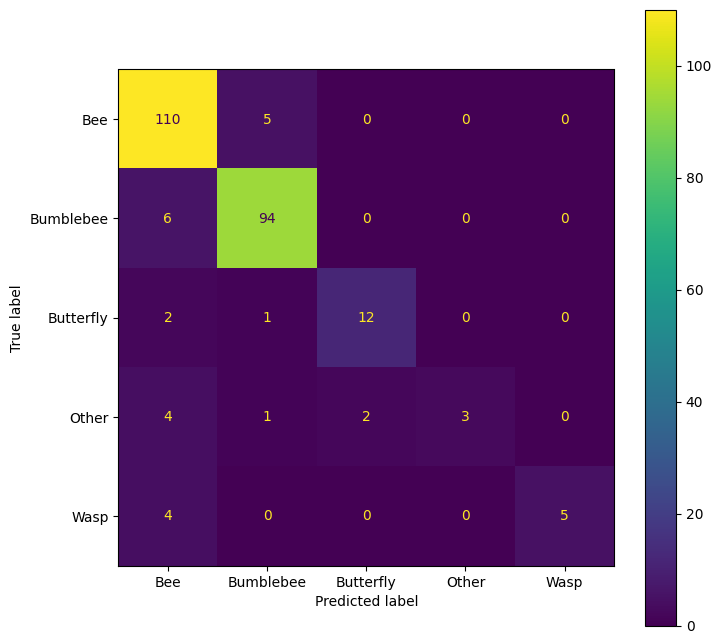

In [96]:
# Just checking if everything is right and models still work
evaluate_classifier(models['xgb'], X_train, y_train5, plot=False, debug=False, n_jobs=-1, cv=cv)
#evaluate_classifier(models['lgb'], X_train, y_train5, plot=False, debug=False, n_jobs=-1, cv=cv)
#evaluate_classifier(models['rf'], X_train, y_train5, plot=False, debug=False, n_jobs=-1, cv=cv)


In [115]:
# With dynamic weights
weights = set_dynamic_weights(models, X_train, y_train5, method='exponential', base=6, min_acceptable_score=0.85)

et model: 0.8512 (weight: 1.0000)
knn model: 0.8554 (weight: 1.1666)
lda model: 0.8914 (weight: 4.4405)
lgb model: 0.8715 (weight: 2.1198)
log model: 0.8955 (weight: 5.1556)
poly_svc model: 0.8957 (weight: 5.1923)
rbf_svc model: 0.8956 (weight: 5.1801)
rf model: 0.8674 (weight: 1.8258)
sigmoid_svc model: 0.8835 (weight: 3.3098)
xgb model: 0.8996 (weight: 6.0000)


The best model was assigned with a weight of 6 (xgboost) and the worst with a weight of 1 (extra trees). Other models are in-between

[0 1 2 3 4]
Accuracy: 0.9116465863453815
Precision: 0.914746900574781
Recall: 0.9116465863453815
F1 Score: 0.9049583344216389
              precision    recall  f1-score   support

         Bee       0.89      0.96      0.92       115
   Bumblebee       0.93      0.94      0.94       100
   Butterfly       0.86      0.80      0.83        15
       Other       1.00      0.30      0.46        10
        Wasp       1.00      0.89      0.94         9

    accuracy                           0.91       249
   macro avg       0.94      0.78      0.82       249
weighted avg       0.91      0.91      0.90       249



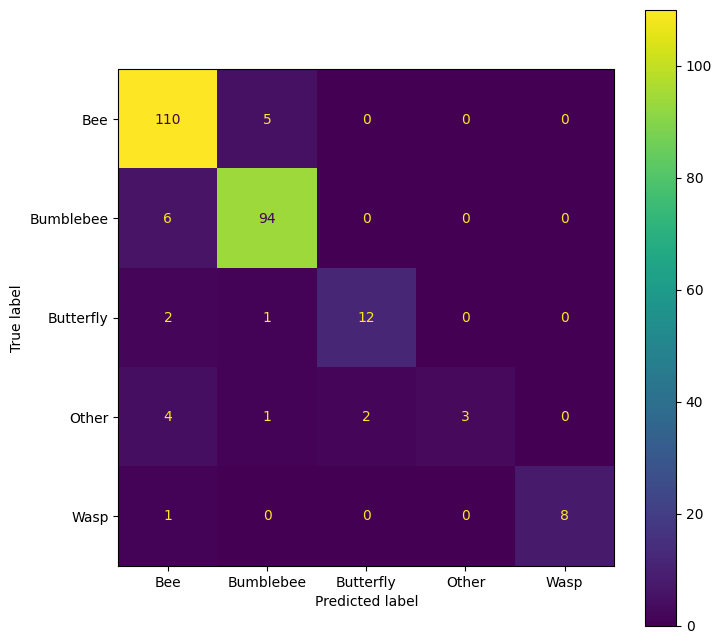

In [100]:
voting_clf = VotingClassifier(
    estimators=models_tuples,
    voting='hard',  # Change to 'soft' for using probabilities
    weights=weights
)
voting_pipe = imbPipeline([
    ('model', voting_clf)
])
evaluate_classifier(voting_pipe, X_train, y_train5)

# Prediction

In [119]:
voting_pipe.fit(X_train, y_encoded_train5)
y_encoded_pred5 = voting_pipe.predict(X_test)
y_pred5 = labelencoder.inverse_transform(y_encoded_pred5)
y_pred5[:5]
# show how sure hte model is thanks to predict_proba
#y_pred_proba5 = voting_pipe.predict_proba(X_test)
#y_pred_proba5[:5]

array(['Bee', 'Bee', 'Bee', 'Bee', 'Bumblebee', 'Bumblebee', 'Bee', 'Bee',
       'Bee', 'Bee', 'Bee', 'Bee', 'Bee', 'Bee', 'Bee', 'Bee', 'Bee',
       'Bee', 'Bee', 'Bee', 'Bee', 'Wasp', 'Wasp', 'Bumblebee',
       'Bumblebee', 'Bumblebee', 'Bumblebee', 'Bumblebee', 'Bee', 'Wasp',
       'Bumblebee', 'Bumblebee', 'Bumblebee', 'Bumblebee', 'Bumblebee',
       'Bumblebee', 'Bumblebee', 'Bumblebee', 'Bumblebee', 'Bumblebee',
       'Bumblebee', 'Bumblebee', 'Bumblebee', 'Bee', 'Bee', 'Bee',
       'Bumblebee', 'Bumblebee', 'Bee', 'Bee', 'Bumblebee', 'Bee', 'Bee',
       'Bee', 'Bee', 'Bee', 'Bee', 'Bee', 'Bee', 'Bee', 'Bumblebee',
       'Butterfly', 'Bee', 'Bumblebee', 'Bumblebee', 'Bumblebee',
       'Bumblebee', 'Bumblebee', 'Bumblebee', 'Bumblebee', 'Bee',
       'Bumblebee', 'Bumblebee', 'Bumblebee', 'Butterfly', 'Bumblebee',
       'Bee', 'Bumblebee', 'Bee', 'Bee', 'Bee', 'Bee', 'Bee', 'Butterfly',
       'Bee', 'Wasp', 'Bee', 'Bee', 'Butterfly', 'Butterfly', 'Butterfly',
       'B

In [180]:
voting_clf.fit(X_train, y_encoded_train5)

0.7731958762886598

In [181]:

from scipy.stats import mode
def calculate_weighted_confidence(voting_clf, X):
    # Extract pipelines and weights from the VotingClassifier
    pipelines = [est for est in voting_clf.estimators_]
    weights = voting_clf.weights if voting_clf.weights is not None else [1] * len(pipelines)
    
    # Get predictions from each individual estimator pipeline
    individual_preds = np.array([pipe.predict(X) for pipe in pipelines])
    
    # Calculate the majority vote predictions across all estimators
    # Assuming `voting='hard'`, this will be the modal (most common) prediction per sample
    y_pred, _ = mode(individual_preds, axis=0)
    y_pred = y_pred.ravel()  # Flatten the array to 1D

    # Count votes for the winning class for each sample, considering weights
    confidence_scores = np.zeros(len(X))
    
    for i in range(len(X)):
        # Get the most voted class for the current sample
        most_voted_class = y_pred[i]
        
        # Count weighted votes for the most voted class
        votes_for_most_voted = sum(weight for pipe, weight, pred in zip(pipelines, weights, individual_preds[:, i]) if pred == most_voted_class)
        
        # Calculate the ratio of votes for the most voted class
        confidence_scores[i] = votes_for_most_voted / sum(weights)
    
    return confidence_scores

# After fitting your voting_clf on training data
confidence_scores = calculate_weighted_confidence(voting_clf, X_test)

# Optionally, you can view or use these confidence scores
print(confidence_scores[:5])


[0.78100648 1.         1.         1.         0.46771466]


In [182]:
len(confidence_scores), len(y_pred5)

(97, 97)

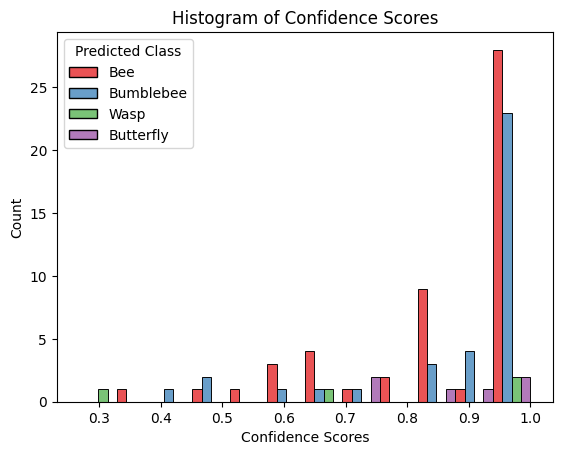

In [175]:
data = pd.DataFrame({'Confidence Scores': confidence_scores, 'Predicted Class': y_pred5})

# Set the color palette based on the predicted class
palette = sns.color_palette('Set1', n_colors=len(data['Predicted Class'].unique()))

# Plot the histogram
sns.histplot(data=data, x='Confidence Scores', hue='Predicted Class', palette=palette, multiple='dodge')

# Set plot title and labels
plt.title('Histogram of Confidence Scores')
plt.xlabel('Confidence Scores')
plt.ylabel('Count')

# Show the plot
plt.show()

# A ne pas mettre on est pas censé avoir les résultats

Accuracy: 0.7731958762886598
Precision: 0.783100869213665
Recall: 0.7731958762886598
F1 Score: 0.7622137636235942
              precision    recall  f1-score   support

         Bee       0.65      0.92      0.76        36
   Bumblebee       0.92      0.72      0.80        46
   Butterfly       1.00      1.00      1.00         6
       Other       0.00      0.00      0.00         3
        Wasp       0.75      0.50      0.60         6

    accuracy                           0.77        97
   macro avg       0.66      0.63      0.63        97
weighted avg       0.78      0.77      0.76        97



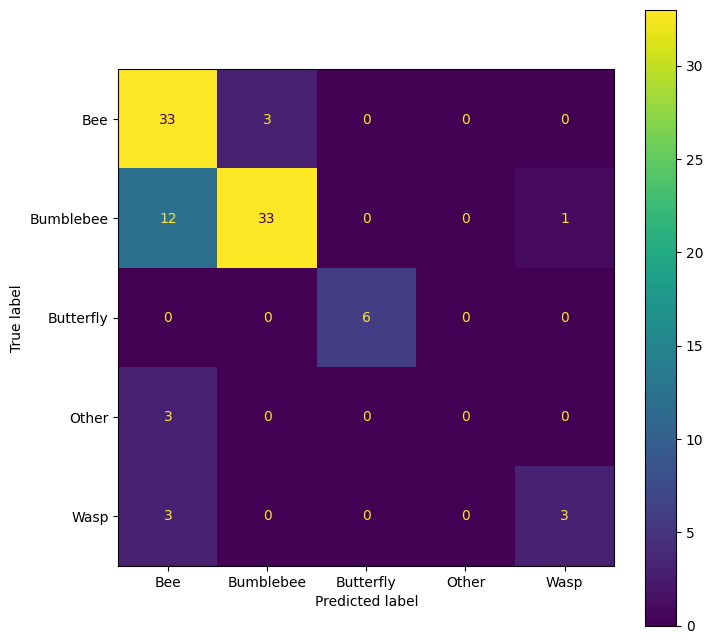

0.7731958762886598

In [184]:
evaluate_predictions(voting_clf, y_test5, y_pred5, y_encoded_test5, plot=True)